## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Simplified Data Reading from PC files

In [2]:
import os
import pandas as pd

# Set the directory where your CSV files are located
directory = r'C:\Users\UseR\Downloads\Documents\ML Projects\Logistic Regression\Client data\input'

# Create an empty list to store DataFrames from individual CSV files
dfs = []

# Loop through the CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dfs.append(df)  # Append the DataFrame to the list

# Combine all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

# Now, 'df' contains the combined data from all CSV files

df.head()

,ts,i_bat_raw,u_bat_raw,t_cells,ca_ch,ca_disch
0,0.000000,0.000000,2.023173,31.859566,0.000000,0.0
1,0.002650,0.252104,2.038012,31.859566,0.000002,0.0
2,0.003132,0.396176,2.051163,31.859566,0.000002,0.0
3,0.003455,0.503980,2.062907,31.859566,0.000002,0.0
4,0.003777,0.611831,2.076739,31.859566,0.000002,0.0


### Checking Data Information

In [3]:
# Corrent data shape
df.shape

(287818, 6)

In [4]:
# Checking Null & NAN value 
df.isnull().sum()

ts           0
i_bat_raw    0
u_bat_raw    0
t_cells      0
ca_ch        0
ca_disch     0
dtype: int64

In [5]:
# Checking dtypes and Memory usage
# All are feature dtypes float64 without ca_disch (int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287818 entries, 0 to 287817
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ts         287818 non-null  float64
 1   i_bat_raw  287818 non-null  float64
 2   u_bat_raw  287818 non-null  float64
 3   t_cells    287818 non-null  float64
 4   ca_ch      287818 non-null  float64
 5   ca_disch   287818 non-null  float64
dtypes: float64(6)
memory usage: 13.2 MB


In [6]:
# Checking count, mean, std, minimum and maximum values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ts,287818.0,35.306558,190.658084,0.000000,9.952296e+00,2.636212e+01,40.826182,3755.953603
i_bat_raw,287818.0,0.069860,3.292053,-4.007385,-3.999840e+00,6.101792e-02,1.483080,8.012872
u_bat_raw,287818.0,3.117005,0.512134,1.989598,2.916507e+00,3.350137e+00,3.505222,3.600475
t_cells,287818.0,32.925380,2.159847,27.823721,3.117700e+01,3.261451e+01,34.447247,41.645876
ca_ch,287818.0,0.854656,0.354198,0.000000,8.448876e-01,1.053726e+00,1.074353,1.170447
ca_disch,287818.0,0.299734,0.431948,0.000000,1.156277e-09,3.396663e-07,0.699273,1.098139


## Data Analysis with Visualization

#### Main Feature Outliers Analysis 

<Axes: xlabel='u_bat_raw', ylabel='Count'>

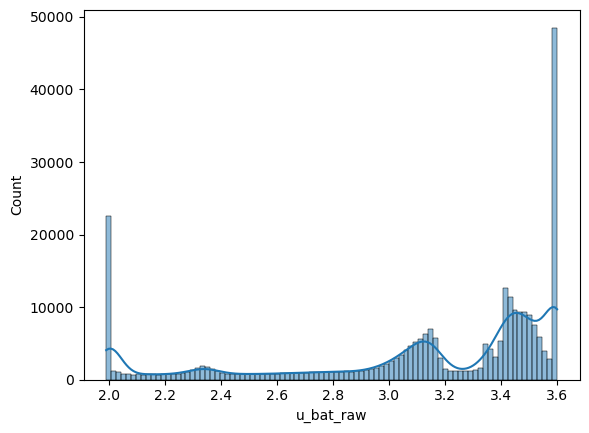

In [7]:
sns.histplot(df['u_bat_raw'], kde= True)
# histplot for specific "u_bat_raw" feature.Some are outliers location both 2.0
# and 3.6 this is not efect our target prediction model

<Axes: xlabel='ca_disch', ylabel='Count'>

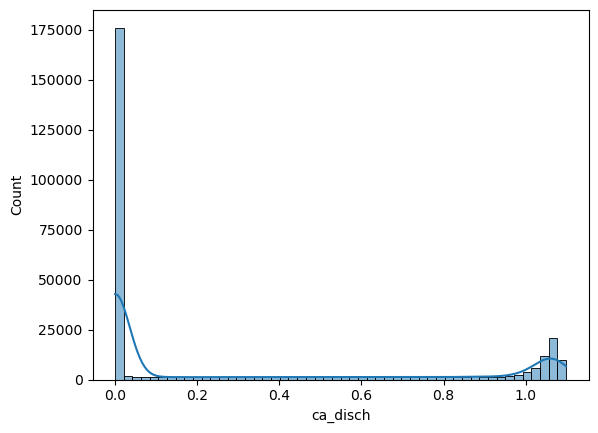

In [8]:
sns.histplot(df['ca_disch'], kde= True)

#### Data Visualization

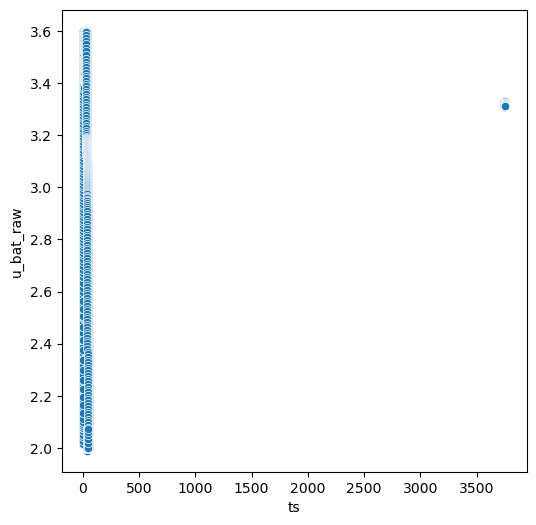

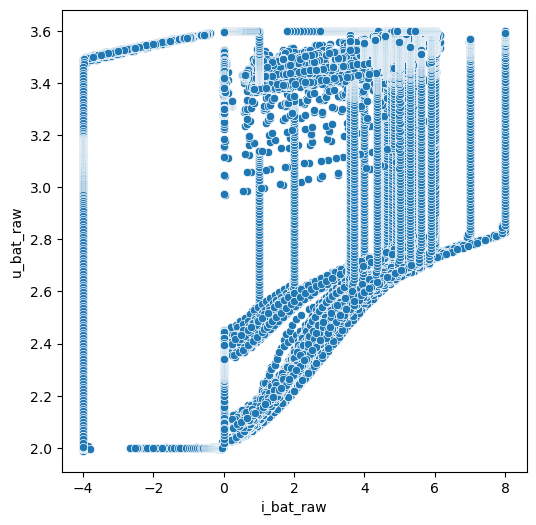

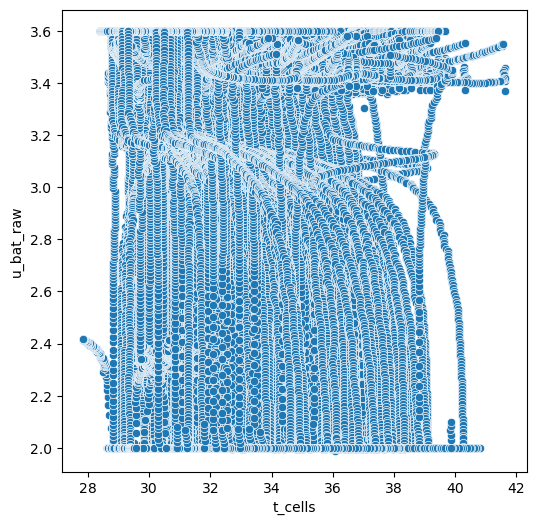

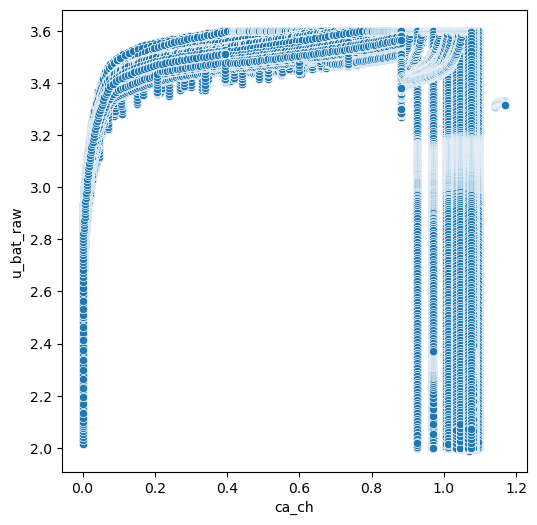

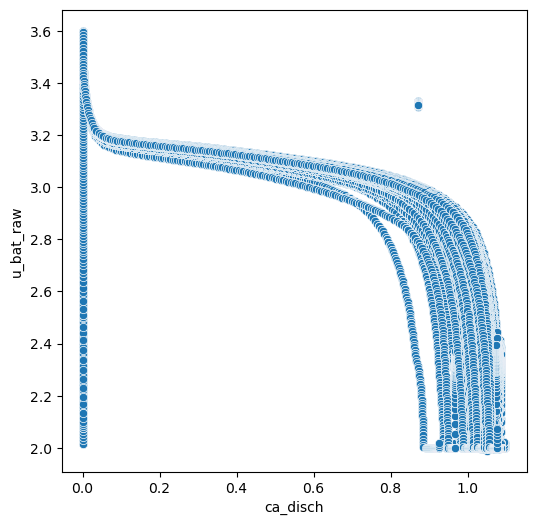

In [9]:
y = df['u_bat_raw']
df_ = df.drop('u_bat_raw', axis=1)

cols = [col for col in df_.columns if df_[col].dtype in ['int64','float64']]

for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=col, y=y, data=df_)
    plt.show

Scatterplot visulization for all feature based on 'u_bat_raw'. 
1. When u_bat_raw vs ts then we are showing time are 0 then battery voltage are same 2.0 to 3.6
2. When u_bat_raw vs ca_disch we are showing discharge 0.0 and 1.0 then battery voltage are same 2.0 to 3.6

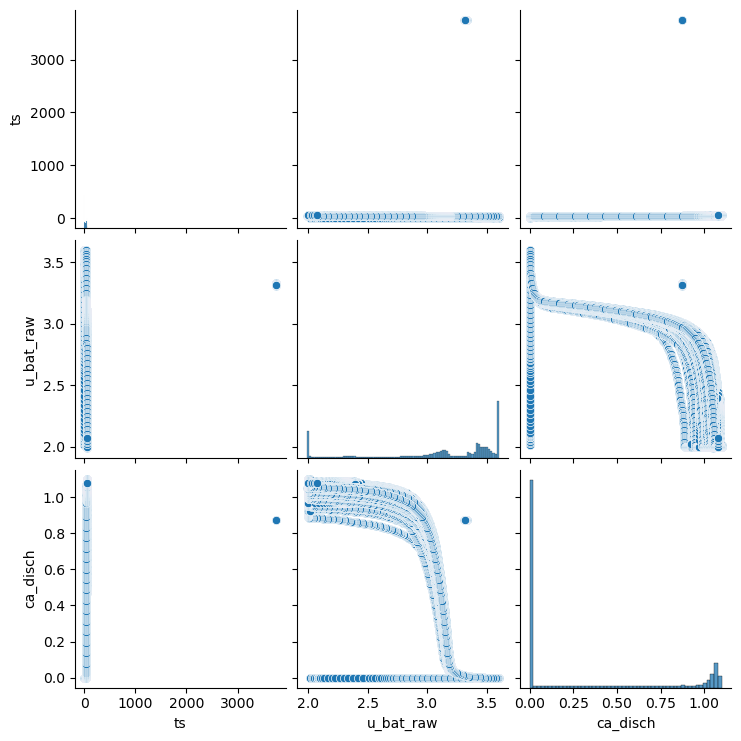

In [10]:
sns.pairplot(df[['ts','u_bat_raw','ca_disch']])

## Separate Dataset

In [11]:
x = df.iloc[:,1:].values
x

array([[0.00000000e+00, 2.02317330e+00, 3.18595660e+01, 0.00000000e+00,
        0.00000000e+00],
       [2.52103809e-01, 2.03801160e+00, 3.18595660e+01, 1.89848280e-06,
        0.00000000e+00],
       [3.96176255e-01, 2.05116270e+00, 3.18595660e+01, 1.89848280e-06,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 2.04846860e+00, 3.29302280e+01, 1.07588830e+00,
        1.07639190e+00],
       [0.00000000e+00, 2.06109140e+00, 3.29174900e+01, 1.07588830e+00,
        1.07639190e+00],
       [0.00000000e+00, 2.07277970e+00, 3.29047850e+01, 1.07588830e+00,
        1.07639190e+00]])

In [12]:
y = df.iloc[:,0].values
y

array([0.00000000e+00, 2.65000000e-03, 3.13166667e-03, ...,
       4.80154250e+01, 4.80321650e+01, 4.80488617e+01])

## Divided the Dataset to train_test_split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

## Using Powerful LinearRegression

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [15]:
reg.fit(x_train, y_train)

LinearRegression()

In [16]:
reg.score(x_train, y_train)

0.07203528488694266

In [17]:
reg.score(x_test, y_test)

0.07396559763619581

We are checking data train and test score using powerful LinearRegression when data shape are full and 
Befor using "Principal Component Analysis (PCA)' and reduction.
And we are showing this score of largest data set.

## Feature Scaling for Data Pre-processing

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
x_train

array([[ 0.28300027,  0.5812972 ,  2.18705242,  0.0931444 , -0.69490543],
       [-0.00696835,  0.94372047, -1.31813993,  0.64113881, -0.69490721],
       [ 1.19404668, -0.5677803 , -0.2186937 , -2.40619668, -0.69490726],
       ...,
       [ 1.42144178,  0.89034467,  1.75558607, -0.18136769, -0.69490726],
       [ 1.72006106,  0.94421517, -0.94747465, -0.1984431 , -0.69490726],
       [ 0.282965  ,  0.62896077, -0.40810104,  0.25672964, -0.69490726]])

In [20]:
x_test

array([[-1.23505194, -0.08802581, -0.96588981,  0.61020151,  0.84857997],
       [-1.2350218 ,  0.1183909 , -0.75539156,  0.62998868, -0.44867118],
       [-0.08097042, -2.17798644, -0.84160181,  0.64689175,  1.79831943],
       ...,
       [-1.23507656, -0.14747843,  0.49785968,  0.63274487,  1.05237888],
       [ 0.89031752,  0.76734335,  1.00995525,  0.0601172 , -0.69490721],
       [-0.02059306,  0.67847907,  1.75295798,  0.07149476, -0.69490726]])

It is used to mediate large number of data and small number of data, it gives a good prediction resut

## Apply Dimensionality Reduction "Principal Component Analysis (PCA)"

In [21]:
# Apply PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [22]:
print(x_train.shape)
print(x_train_new.shape)

(230254, 5)
(230254, 3)


In [23]:
pca.explained_variance_ratio_

array([0.52369867, 0.28998396, 0.12563477])

When we used PCA it was found that the most important data and features remained from the combined data.  Which is numbered ( Row - 230253, Column - 3).  These are smaller versions of your original data.  These will be of higher quality than full data.  Because different algorithms are used on this data.  If further reduction is made from this, its qualitative value will not be maintained.

In [24]:
reg.fit(x_train_new, y_train)

LinearRegression()

In [25]:
reg.score(x_train_new, y_train)

0.019837347634321656

In [26]:
reg.score(x_test_new, y_test)

0.019774974227555475

## For Loop for accuracy

In [27]:
accuracy = []

for i in range (1, 6):
    pca = PCA(n_components = i)
    x_tr = pca.fit_transform(x_train)
    x_te = pca.transform(x_test)
    
    reg.fit(x_tr, y_train)
    pred = reg.score(x_te, y_test)
    print(pred)
    accuracy.append(pred)

0.009404548726323458
0.015614725884429581
0.019774974227555475
0.03750345829225232
0.07396559763619559


In [28]:
reg.score(x_tr, y_train)

0.07203528488694289

In [29]:
reg.score(x_te, y_test)

0.07396559763619559

Now you can see for yourself that the predictive score before using PCA and the qualitative score after using PCA are just as good as before after shrinking the data.  This is the main twist of PCA reduction. Let this curated dataset and analysis fulfill your requirements. 
And you can continue your desired work effortlessly. 

And stay a few steps ahead in this digital world.